In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

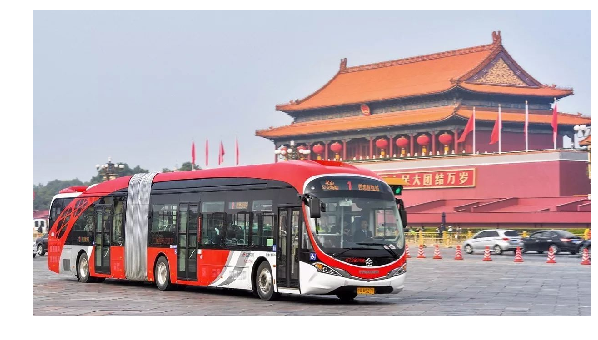

In [8]:
image = cv2.imread("../../datasets/bus.jpg")
image = image[:,:,[2, 1, 0]]

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
tensor = cv2.dnn.blobFromImage(image, 1.0, (224, 224), 
                               (104, 117, 123), False, False)
tensor.shape

(1, 3, 224, 224)

In [7]:
net = cv2.dnn.readNetFromCaffe("../../pretrained-models/bvlc_googlenet.prototxt",
                               "../../pretrained-models/bvlc_googlenet.caffemodel")
labels = open("../../pretrained-models/synset_words.txt").read().strip().split("\n")
if not net.empty():
    net.setInput(tensor)
    probs = net.forward()
    classID = np.argmax(probs)
    className = labels[classID]
    print("Best class: #{} {}".format(classID, className[9:]))
    print("Probability: {:.2f}%".format(probs.max() * 100))

Best class: #829  streetcar, tram, tramcar, trolley, trolley car
Probability: 68.33%
